# Detect Tumor from images. Basic Image Preprocessing, CNN and Transfer Learning

In [1]:
# To remove deprecated warnings from the tensorflow
import warnings
warnings.filterwarnings("ignore")

#### Get the current working directory

In [2]:
import os
PATH = os.getcwd()
PATH

'C:\\Users\\lenovo\\Desktop\\insofe_bootcamp\\assignments\\DL\\Deep_assignment\\TL_3466_Jolly'

#### Define the data path

In [3]:
DATA_PATH = os.path.join(PATH, 'Training')
data_dir_list = os.listdir(DATA_PATH)

In [4]:
print(DATA_PATH)


C:\Users\lenovo\Desktop\insofe_bootcamp\assignments\DL\Deep_assignment\TL_3466_Jolly\Training


#### Get the list of folders inside data path

In [5]:
print(data_dir_list)


['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


#### Required variables declaration and initialization

In [6]:
img_rows=224
img_cols=224
num_channel=3

num_epoch=10
batch_size=32

img_data_list=[]
classes_names_list=[]

#### Read the images and store them in the list

In [8]:
import cv2
#troubleshoot why failing....
for dataset in data_dir_list:
    print(dataset)
    classes_names_list.append(dataset) 
    print ('Loading images from {} folder\n'.format(dataset)) 
    img_list=os.listdir(DATA_PATH+'/'+ dataset)
    for img in img_list:
        #print("here")
        input_img=cv2.imread(DATA_PATH + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(img_rows, img_cols))
        img_data_list.append(input_img_resize)

glioma_tumor
Loading images from glioma_tumor folder

meningioma_tumor
Loading images from meningioma_tumor folder

no_tumor
Loading images from no_tumor folder

pituitary_tumor
Loading images from pituitary_tumor folder



#### Get the number of classes

In [9]:
num_classes = len(classes_names_list)
print(num_classes)

4


####  Image preprocessiong

Normalize Pixel Values
For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

It is valid for images to have pixel values in the range 0-1 and images can be viewed normally.

This can be achieved by dividing all pixels values by the largest pixel value; that is 255. This is performed across all channels, regardless of the actual range of pixel values that are present in the image.

The example below loads the image and converts it into a NumPy array. The data type of the array is reported and the minimum and maximum pixels values across all three channels are then printed. Next, the array is converted to the float data type before the pixel values are normalized and the new range of pixel values is reported.



In [10]:
import numpy as np

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255

In [11]:
print (img_data.shape)

(2870, 224, 224, 3)


In [13]:
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape

In [18]:
print(img_data[0].shape,img_data.shape[0])

(224, 224, 3) 2870


In [14]:

print(num_of_samples, input_shape)

2870 (224, 224, 3)


In [19]:
classes = np.ones((num_of_samples,), dtype='int64')
classes


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [15]:
#there are 155 images in yes "1" , 98 images in no folder "0".

In [20]:
classes[0:827]=0
classes[827:1650]=1
classes[1650:2045]=2

classes[2045:]=3


Convert class labels to numberic using on-hot encoding

In [17]:
classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# classes: class vector to be converted into a matrix (integers from 0 to num_classes).
num_classes: total number of classes.
dtype: The data type expected by the input, as a string (float32, float64, int32...)
Returns: 
A binary matrix representation of the input. The classes axis is placed last.

In [21]:
from keras.utils import to_categorical

classes = to_categorical(classes, num_classes)

Using TensorFlow backend.


#### Shuffle the dataset

In [22]:
from sklearn.utils import shuffle

X, Y = shuffle(img_data, classes, random_state=2)

#### Split the dataset

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
#y_test.shape
X_train.shape

(2296, 224, 224, 3)

####  Defining the model

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D,MaxPool2D,BatchNormalization,Flatten,Dropout,Dense,Activation
from keras.activations import relu,tanh,softmax
#from keras.optimizers.adam import Ada
from keras.losses import categorical_crossentropy
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

In [32]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 4 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=0,factor=0.5, min_lr=0.00001)
callbacks1=[EarlyStopping(patience=10,monitor='val_loss'),ModelCheckpoint(filepath="mymodel_{epoch}",save_best_only=True,monitor="val_loss",verbose=0),learning_rate_reduction]
#history = model.fit_generator(traindatagenerator,epochs = 20,verbose=0,steps_per_epoch=len(X_train)/32,callbacks = callbacks1,validation_data=testdatagenerator)

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 224, 224, 75)      2100      
_________________________________________________________________
batch_normalization_7 (Batch (None, 224, 224, 75)      300       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 75)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 112, 112, 50)      33800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 112, 112, 50)      0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 112, 112, 50)      200       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 50)       

In [34]:
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 2296 samples, validate on 574 samples
Epoch 1/10
2296/2296 [==============================] - 776s 338ms/step - loss: 2.5833 - accuracy: 0.6002 - val_loss: 20.6149 - val_accuracy: 0.1359
Epoch 2/10
2296/2296 [==============================] - 753s 328ms/step - loss: 0.6269 - accuracy: 0.7526 - val_loss: 23.4213 - val_accuracy: 0.1638
Epoch 3/10
2296/2296 [==============================] - 758s 330ms/step - loss: 0.5019 - accuracy: 0.7896 - val_loss: 23.5871 - val_accuracy: 0.1341
Epoch 4/10
2296/2296 [==============================] - 702s 306ms/step - loss: 0.4007 - accuracy: 0.8415 - val_loss: 20.3167 - val_accuracy: 0.1341
Epoch 5/10
2296/2296 [==============================] - 686s 299ms/step - loss: 0.3285 - accuracy: 0.8619 - val_loss: 11.3732 - val_accuracy: 0.2282
Epoch 6/10
2296/2296 [==============================] - 665s 289ms/step - loss: 0.2946 - accuracy: 0.8807 - val_loss: 2.8127 - val_accuracy: 0.4599
Epoch 7/10
2296/2296 [==============================] - 665s

In [35]:
score = model.evaluate(X_test, y_test, batch_size=batch_size)

print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

574/574 [==============================] - 49s 85ms/step
Test Loss: 1.1729282020276433
Test Accuracy: 0.7735191583633423


In [37]:
score = model.evaluate(X_train, y_train, batch_size=batch_size)

print('Train Loss:', score[0])
print('Train Accuracy:', score[1])

2296/2296 [==============================] - 199s 87ms/step
Train Loss: 0.6801971263083457
Train Accuracy: 0.8018292784690857


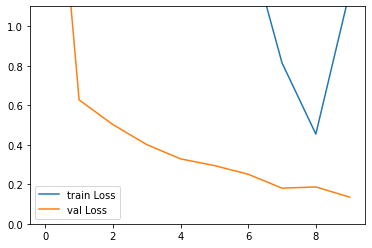

In [41]:
import matplotlib.pyplot as plt
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.ylim((0,1.1))
plt.legend(['train Loss','val Loss'])




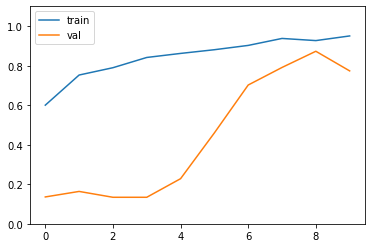

In [40]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylim((0,1.1))
plt.legend(['train','val'])



# Building a VGG-16 model by training last two Dense layer

In [32]:
from keras.layers import Input, Dense
from tensorflow.keras.models import Model
import keras
from keras.applications.vgg16 import VGG16
image_input = Input(shape=(img_rows, img_cols, num_channel))
model = VGG16(input_tensor=image_input, include_top=False, weights='imagenet')

In [33]:
last_layer = model.get_layer('block5_pool').output
x = Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_vgg_model = keras.Model(image_input, out)

custom_vgg_model.summary()




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [34]:
for layer in custom_vgg_model.layers[:-3]:
    layer.trainable = False


In [36]:
custom_vgg_model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=0,factor=0.5, min_lr=0.00001)
callbacks1=[EarlyStopping(patience=10,monitor='val_loss'),ModelCheckpoint(filepath="mymodel_{epoch}",save_best_only=True,monitor="val_loss",verbose=0),learning_rate_reduction]
history = custom_vgg_model.fit(X_train, y_train, batch_size=batch_size, epochs=15, verbose=1, validation_data=(X_test, y_test))

Train on 2296 samples, validate on 574 samples
Epoch 1/15
2296/2296 [==============================] - 840s 366ms/step - loss: 0.1185 - accuracy: 0.9591 - val_loss: 0.3009 - val_accuracy: 0.9024
Epoch 2/15
2296/2296 [==============================] - 818s 356ms/step - loss: 0.0197 - accuracy: 0.9974 - val_loss: 0.3934 - val_accuracy: 0.8937
Epoch 3/15
2296/2296 [==============================] - 795s 346ms/step - loss: 0.0167 - accuracy: 0.9965 - val_loss: 0.4980 - val_accuracy: 0.8885
Epoch 4/15
2296/2296 [==============================] - 1304s 568ms/step - loss: 0.0556 - accuracy: 0.9782 - val_loss: 0.6470 - val_accuracy: 0.8397
Epoch 5/15
2296/2296 [==============================] - 805s 351ms/step - loss: 0.0436 - accuracy: 0.9817 - val_loss: 0.3922 - val_accuracy: 0.9077
Epoch 6/15
2296/2296 [==============================] - 1807s 787ms/step - loss: 0.0345 - accuracy: 0.9900 - val_loss: 0.3531 - val_accuracy: 0.9059
Epoch 7/15
2296/2296 [==============================] - 812s 35

# Evaluating the Tranfer Learning model

In [37]:
score = custom_vgg_model.evaluate(X_test, y_test, batch_size=batch_size)

print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

574/574 [==============================] - 161s 280ms/step
Test Loss: 0.34581272934891205
Test Accuracy: 0.9320557713508606


In [38]:
score = custom_vgg_model.evaluate(X_train, y_train, batch_size=batch_size)

print('Train Loss:', score[0])
print('Train Accuracy:', score[1])

2296/2296 [==============================] - 556s 242ms/step
Train Loss: 0.00018191527277523268
Train Accuracy: 1.0


In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.ylim((0,1.1))
plt.legend(['train Loss','val Loss'])

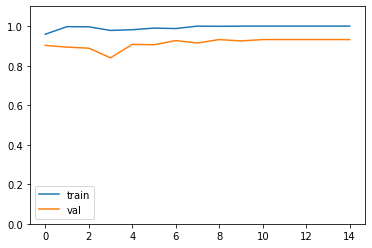

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim((0,1.1))
plt.legend(['train','val'])

In [58]:
import pandas as pd
df= pd.DataFrame({"Train_Accuracy":[80,97], "Test_Accuracy":[77,88]}, index={"CNN", "VGG16"})
df

,Train_Accuracy,Test_Accuracy
CNN,80,77
VGG16,97,88


In [56]:

Y_test_pred = custom_vgg_model.predict(X_test)
y_test_pred = np.argmax(Y_test_pred, axis=1)
print(y_test_pred)

[0 0 1 0 1 3 0 3 3 3 3 2 0 3 0 2 0 3 3 1 1 3 0 3 3 0 2 2 1 0 3 1 3 0 0 3 1
 1 0 3 0 0 0 2 3 0 3 1 0 2 2 1 0 0 0 0 2 3 3 0 0 1 3 0 2 3 1 3 0 0 0 0 1 1
 0 3 3 3 1 1 2 1 1 3 2 0 0 1 1 0 2 0 3 0 1 0 1 1 3 0 3 1 2 3 2 2 0 3 1 1 3
 0 3 1 0 2 3 0 3 0 3 1 3 0 3 1 0 2 3 0 0 3 3 3 1 0 1 2 3 0 2 3 0 1 3 2 0 0
 3 1 0 1 1 1 2 0 3 1 1 3 0 0 3 0 1 0 2 0 0 3 0 0 0 0 0 1 3 3 0 1 3 2 3 3 1
 3 0 0 1 0 2 0 0 3 3 3 1 0 3 3 1 1 0 1 0 0 3 0 1 3 1 2 0 1 1 0 1 2 0 0 3 0
 0 3 1 0 1 0 3 3 3 3 1 0 0 3 0 0 2 0 0 0 3 0 0 0 0 0 0 3 0 3 0 0 0 0 0 1 0
 1 1 2 1 0 3 0 1 0 3 2 3 3 3 2 2 1 2 3 0 1 0 3 1 3 0 3 2 2 2 2 0 1 0 0 3 3
 2 3 1 3 2 0 0 3 0 3 3 0 3 0 0 1 1 3 1 0 1 3 3 2 0 0 3 0 1 3 1 2 0 0 2 3 0
 1 2 2 0 3 1 3 0 1 3 0 1 3 3 0 0 2 0 1 2 0 0 3 0 3 1 3 0 0 2 0 3 2 0 0 2 3
 3 3 2 2 0 3 3 3 1 1 1 0 0 3 0 1 2 1 3 0 0 0 3 3 2 0 0 0 0 0 0 1 1 0 1 3 3
 3 2 2 3 1 1 0 1 3 3 1 3 2 2 3 0 0 0 1 3 3 0 2 0 3 0 0 3 1 2 0 3 3 3 3 1 3
 0 3 0 2 1 3 0 0 0 0 3 0 0 3 0 2 3 0 2 0 3 0 0 3 1 2 1 1 0 0 0 0 3 2 3 3 3
 2 2 3 3 1 0 3 0 1 0 3 0 

# Next task is to add noise in data using image datagenerator and then build the model.

AttributeError: 'DataFrame' object has no attribute 'unique'

AttributeError: 'numpy.ndarray' object has no attribute 'unique'